
## Clasificación de Diabetes - Análisis Exploratorio de Datos (EDA)

En esta actividad, llevaremos a cabo un análisis exploratorio de datos sobre un conjunto que contiene información relevante acerca de factores que pueden influir en la presencia de diabetes en las personas. Nuestro objetivo principal será identificar los factores con mayor impacto en el desarrollo de esta enfermedad. Posteriormente, desarrollaremos un modelo de clasificación que nos permitirán predecir la probabilidad de que una persona padezca diabetes basándonos en sus características principales.

El conjunto de datos utilizado proviene del sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS), y corresponde a una encuesta telefónica relacionada con la salud realizada en 2015. Todas las características del conjunto de datos se basan en preguntas hechas directamente a los participantes o en variables calculadas en función de sus respuestas individuales.

# Librerías

Las librerías que vamos a utilizar para el desarrollo de la actividad son:

In [292]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Configuración de las Gráficas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","purple","#fcbf49"]
sns.set_theme( palette= palette, context= "notebook")


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Ingreso de Datos

Comenzaremos importando el conjunto de datos que utilizaremos para llevar a cabo el análisis exploratorio y la generación de modelos de clasificación.

In [293]:
# Ingresamos el dataset con el que vamos a realizar el análisis
# ==============================================================================

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Podemos observar que el conjunto de datos cuenta con 256,680 registros y 22 características las cuales son:

In [294]:
# obtenemos los nombres de las columnas
# ==============================================================================

df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

- **Diabetes_binary**: Variable binaria que indica la presencia de diabetes. Un valor de 0 señala la ausencia de diabetes y 1 su presencia. Esta característica será nuestra variable objetivo para predecir si una persona tiene diabetes en función de las demás características del conjunto de datos.

- **HighBP**: Indica si la persona ha sido diagnosticada con presión alta. Codificada como 0 para "No" y 1 para "Sí".

- **HighChol**: Se refiere a si la persona ha sido diagnosticada con colesterol alto. Codificada como 0 para "No" y 1 para "Sí".

- **CholCheck**: Muestra si la persona se ha realizado un chequeo de colesterol en los últimos 5 años. Codificada como 0 (No) y 1 (Sí), esta variable puede ayudar a evaluar la conciencia sobre la salud cardiovascular y las prácticas preventivas.

- **BMI**: El Índice de Masa Corporal (BMI) mide el peso en relación con la altura y se utiliza para clasificar el peso en categorías como bajo peso, peso normal, sobrepeso y obesidad. Es una variable continua.

- **Smoker**: Indica si la persona ha fumado al menos 100 cigarrillos en su vida. Codificada como 0 (No) y 1 (Sí), es crucial para analizar el impacto del tabaquismo en la salud.

- **Stroke**: Muestra si la persona ha sufrido un accidente cerebrovascular. Variable binaria, con 0 para "No" y 1 para "Sí".

- **HeartDiseaseorAttack**: Indica si la persona ha tenido alguna enfermedad cardíaca o un ataque al corazón. Codificada como 0 (No) y 1 (Sí).

- **PhysActivity**: Muestra si la persona ha realizado alguna actividad física fuera de su trabajo habitual en los últimos 30 días. Codificada como 0 (No) y 1 (Sí), esta variable ayuda a evaluar el nivel de actividad física y su relación con la salud.

- **Fruits**: Indica si la persona consume frutas una o más veces al día. Codificada como 0 (No) y 1 (Sí).

- **Veggies**: Muestra si la persona consume verduras una o más veces al día. Codificada como 0 (No) y 1 (Sí).

- **HvyAlcoholConsump**: Indica si la persona consume alcohol en exceso (más de 14 bebidas por semana para hombres y más de 7 para mujeres). Codificada como 0 (No) y 1 (Sí), es relevante para analizar el impacto del consumo excesivo de alcohol.

- **AnyHealthcare**: Muestra si la persona tiene algún tipo de seguro de salud o cobertura médica. Variable binaria con 0 para "No" y 1 para "Sí".

- **NoDocbcCost**: Indica si la persona no pudo ver a un médico en los últimos 12 meses debido al costo. Codificada como 0 (No) y 1 (Sí), puede reflejar problemas de acceso a la atención médica.

- **GenHlth**: Autoevaluación de la salud general en una escala de 1 a 5, donde 1 significa "Excelente" y 5 "Pobre". Proporciona una visión subjetiva del estado general de salud.

- **MentHlth**: Muestra el número de días en los últimos 30 en que la salud mental de la persona no fue buena.

- **PhysHlth**: Indica el número de días en los últimos 30 en que la salud física de la persona no fue buena.

- **DiffWalk**: Muestra si la persona tiene dificultades para caminar o subir escaleras. Codificada como 0 (No) y 1 (Sí), esta variable es útil para identificar limitaciones en la movilidad.

- **Sex**: Indica el sexo de la persona, con 0 para "Femenino" y 1 para "Masculino".

- **Age**: Grupo de edad de la persona, codificado en intervalos de 5 años:
    - 1: 18-24 años
    - 2: 25-29 años
    - 3: 30-34 años
    - 4: 35-39 años
    - 5: 40-44 años
    - 6: 45-49 años
    - 7: 50-54 años
    - 8: 55-59 años
    - 9: 60-64 años
    - 10: 65-69 años
    - 11: 70-74 años
    - 12: 75-79 años
    - 13: 80 años o más

- **Education**: Nivel educativo alcanzado por la persona, codificado en una escala de 1 a 7:
    - 1: Nunca asistió a la escuela o solo jardín de infantes
    - 2: Grados 1 a 8 (elemental)
    - 3: Grados 9 a 11 (algún nivel de secundaria)
    - 4: Graduado de secundaria
    - 5: Algún nivel universitario o escuela técnica
    - 6: Graduado de universidad o escuela técnica
    - 7: Posgrado

- **Income**: Nivel de ingreso anual de la persona, codificado de la siguiente manera:
    - 1: Menos de $10,000
    - 2: $10,000 a $14,999
    - 3: $15,000 a $19,999
    - 4: $20,000 a $24,999
    - 5: $25,000 a $34,999
    - 6: $35,000 a $49,999
    - 7: $50,000 a $74,999
    - 8: $75,000 o más

# 2. Análisis Exploratorio de Datos

A continuación, se llevará a cabo un análisis exploratorio de datos con el objetivo de identificar las principales características de nuestro conjunto de datos. Esta etapa incluye tareas relacionadas con la limpieza de datos, tales como la detección y el tratamiento de valores faltantes y valores atípicos, asi como la eliminación de registros duplicados. El análisis exploratorio nos permitirá identificar patrones, tendencias y relaciones entre las distintas variables presentes en el conjunto de datos.

## 1.2 Resúmenes de Datos

Vamos a obtener los resúmenes descriptivos del conjunto de datos para comenzar a comprender sus principales características

In [295]:
# Obtenemos información de cada columna del conjunto de datos
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## 1.3 Valores Faltantes

En esta sección, procederemos a verificar si alguna de las variables en nuestro conjunto de datos presenta valores faltantes.

In [296]:
# Identificamos los valores faltantes en el conjunto de datos
# ==============================================================================

df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Podemos observar que ninguna de las variables presenta valores faltantes.

## 1.4 Valores Duplicados

A continuación, procederemos a verificar si existen registros duplicados en nuestro conjunto de datos.


In [297]:
# Comprobamos cuantas filas duplicadas hay en el conjunto de datos
# ==============================================================================

print(f"Hay {df.duplicated().sum()} filas duplicadas en el conjunto de datos")

Hay 24206 filas duplicadas en el conjunto de datos


El conjunto de datos presenta 24,206 registros duplicados. Esta situación puede sesgar el modelo de clasificación que posteriormente vamos a generar. Por lo tanto, procederemos a eliminar los registros duplicados. Esta decisión se basa en que, incluso después de eliminar los registros duplicados, contaremos con una cantidad suficiente de datos para continuar con el análisis.

In [298]:
# Eliminamos las filas duplicadas del conjunto de datos
# ==============================================================================

df.drop_duplicates(inplace=True)

Verificamos que ya no haya presencia de registros duplicados.

In [299]:
# Comprobamos cuantas filas duplicadas hay en el conjunto de datos
# ==============================================================================

print(f"Hay {df.duplicated().sum()} filas duplicadas en el conjunto de datos")

Hay 0 filas duplicadas en el conjunto de datos


Observamos que, efectivamente, ya no hay registros duplicados. Ahora, procederemos a comprobar el tamaño del DataFrame resultante después de la eliminación.

In [300]:
# Imprimimos las dimensiones del conjunto de datos después de eliminar las filas duplicadas
# ==============================================================================

print(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El conjunto de datos tiene 229474 filas y 22 columnas


El conjunto de datos ahora contiene 229,474 registros, por lo que podemos continuar con el análisis exploratorio de datos.

## 1.5 Valores Atípicos

A continuación, vamos a crear diagramas de caja para detectar los valores atípicos presentes en nuestro conjunto de datos. En este caso, no evaluaremos las variables binarias, ya que solo pueden tomar dos valores. En su lugar, nos centraremos en las variables numéricas que pueden tomar más de dos valores, las cuales son:

In [301]:
# Detectamos las columnas que tienen mas de dos valores únicos
# ==============================================================================
lista_caracteristicas = []

for i in df.columns:
    if df[i].nunique() > 2:
        print(f"{i} tiene {df[i].nunique()} valores únicos")
        lista_caracteristicas.append(i)
        
print(f'\nLas características con más de dos valores únicos son: {lista_caracteristicas}')
        

BMI tiene 84 valores únicos
GenHlth tiene 5 valores únicos
MentHlth tiene 31 valores únicos
PhysHlth tiene 31 valores únicos
Age tiene 13 valores únicos
Education tiene 6 valores únicos
Income tiene 8 valores únicos

Las características con más de dos valores únicos son: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


Ahora que hemos identificado las características que tienen más de dos valores únicos, procederemos a representarlas gráficamente con el fin de detectar posibles valores atípicos.

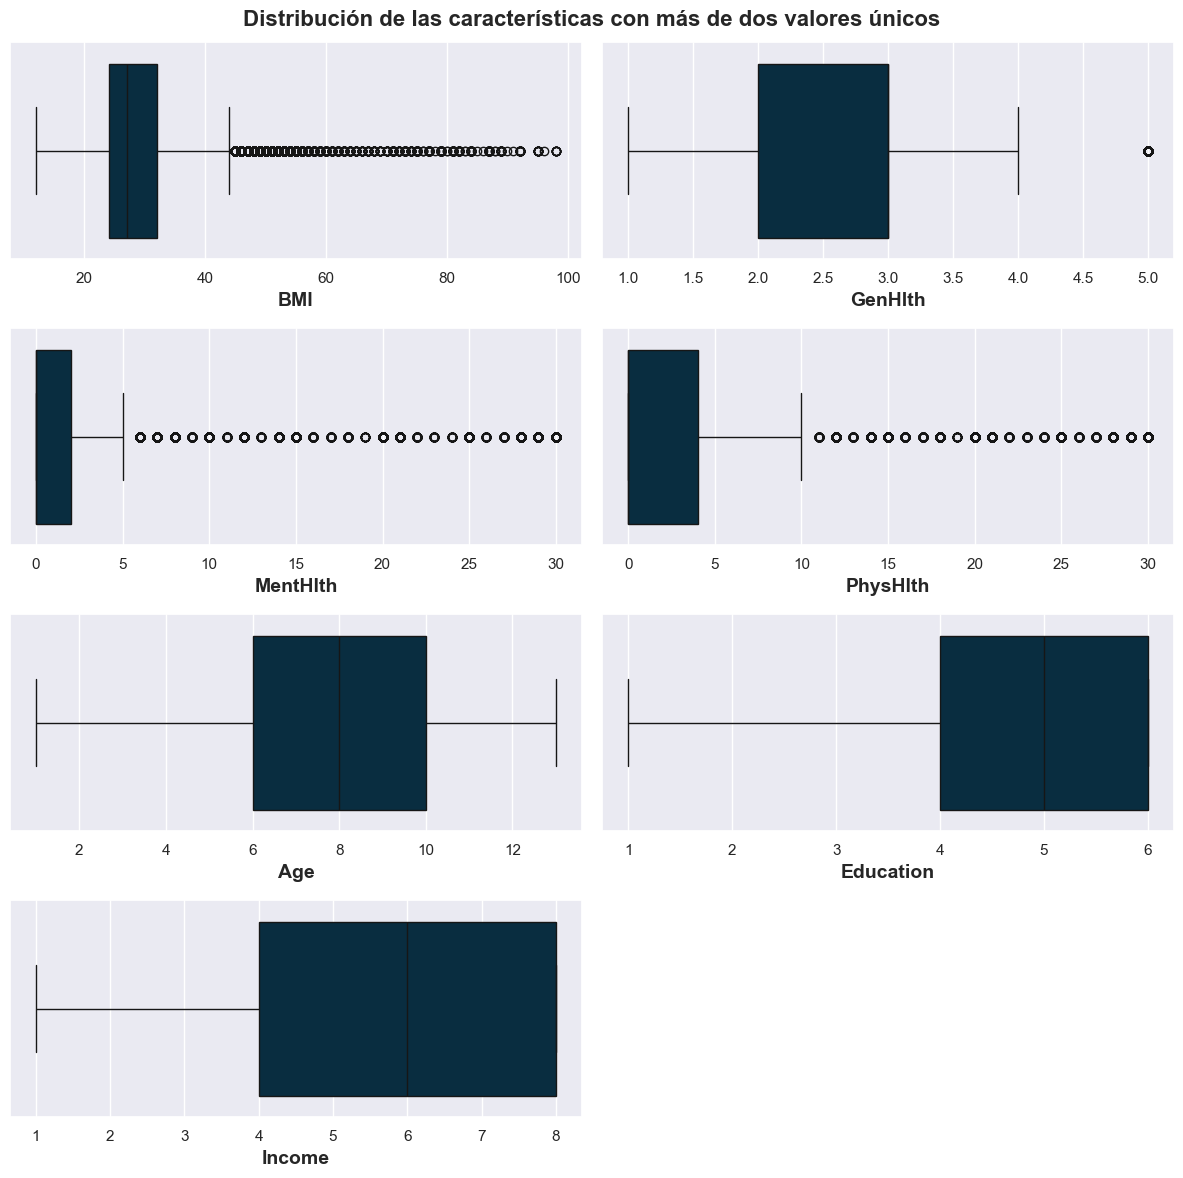

In [302]:
# Creamos un gráfico de cajas para cada una de las características con más de dos valores únicos
# ==============================================================================

fig, axes = plt.subplots(nrows=4, 
                         ncols=2, 
                         figsize=(12, 12)
                         )

for i in range(len(lista_caracteristicas)):
    fila = i // 2
    columna = i % 2
    sns.boxplot(data= df, x= lista_caracteristicas[i], ax= axes[fila, columna], palette= palette)
    axes[fila, columna].set_xlabel(lista_caracteristicas[i], fontsize= 14, fontweight= 'bold')
fig.suptitle('Distribución de las características con más de dos valores únicos', fontsize= 16, fontweight= 'bold')
fig.delaxes(axes[3,1])
fig.tight_layout()
    

De acuerdo con los diagramas de caja que hemos generado, podemos identificar lo siguiente:

- El índice de masa corporal (BMI) presenta valores atípicos en el rango de aproximadamente 45 a 100. Según la Organización Mundial de la Salud, los rangos establecidos para el BMI son los siguientes:
  
  - BMI < 18.50: Se considera peso bajo.
  - 18.5 < BMI ≤ 24.99: Indica un peso normal.
  - 25 ≤ BMI < 29.99: Indica sobrepeso.
  - BMI ≥ 30: Indica obesidad, la cual se clasifica en:
    - 30 ≤ BMI < 34.99: Obesidad leve.
    - 35 ≤ BMI < 39.99: Obesidad media.
    - BMI ≥ 40: Obesidad mórbida.

Dado estos rangos, utilizaremos un umbral de BMI de 60, ya que valores superiores a este pueden ser muy raros y no representativos del conjunto de datos. Por lo tanto, excluiremos los registros con un valor de BMI mayor a 60.

- En cuanto a la variable `GenHlth`, que refleja la autoevaluación del estado de salud del paciente, observamos que la mayoría de los datos se concentran en los valores 2 y 3, correspondientes a una autoevaluación de "regular". También existen valores de 5 que indican una autoevaluación de "pobre". Aunque estos valores se consideran atípicos según el diagrama de caja, no representan un error en la toma de datos, por lo que optamos por mantenerlos en el conjunto de datos.

- La variable `MentHlth` muestra valores atípicos mayores a 5, indicando que algunas personas reportaron no haber tenido una buena salud mental durante más de 5 días en los últimos 30 días.

- La variable `PhysHlth` presenta valores atípicos mayores a 10, lo que sugiere que una cantidad considerable de personas manifestaron no haber estado bien físicamente durante más de 10 días en los últimos 30 días.

- Las variables `Age`, `Income` y `Education` no presentan valores atípicos.

Vamos a comprobar cuantos registros tienen un valor mayor a 60 en la columna de "BMI", los cuales van a ser eliminados posteriormente

In [303]:
# Observamos los registros que tienen un valor mayor de 60 en la columna 'BMI'
# ==============================================================================

df[df['BMI'] > 60]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2415,1.0,1.0,1.0,1.0,63.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,15.0,30.0,1.0,1.0,9.0,3.0,5.0
2486,1.0,1.0,1.0,1.0,61.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,3.0,30.0,1.0,1.0,9.0,5.0,6.0
2547,0.0,1.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,4.0,1.0,0.0,3.0,4.0,1.0
3125,0.0,1.0,0.0,1.0,61.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,3.0,5.0,1.0,0.0,5.0,5.0,2.0
3769,1.0,1.0,0.0,1.0,63.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,0.0,20.0,1.0,0.0,10.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243002,0.0,1.0,1.0,1.0,74.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,12.0,4.0,5.0
244309,0.0,1.0,1.0,1.0,95.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,5.0,9.0,1.0,0.0,8.0,4.0,5.0
244427,1.0,1.0,1.0,1.0,65.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,30.0,1.0,0.0,7.0,4.0,8.0
249875,0.0,0.0,0.0,1.0,63.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,5.0,0.0,0.0,0.0,6.0,5.0,5.0



 Ahora procederemos a eliminar los registros con un BMI mayor a 60 de nuestro conjunto de datos.

In [304]:
# Eliminamos los valores mayores a 60 en la columna 'BMI'
# ==============================================================================

df.drop(df[df['BMI'] > 60].index, inplace= True)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Verificamos si se han eliminado correctamente los registros que contienen un valor de BMI mayor a 60.

In [305]:
# Comprobamos que no haya valores mayores a 60 en la columna 'BMI'
# ==============================================================================

df[df['BMI'] > 60]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


Ahora procederemos a comprobar el tamaño del DataFrame después de la eliminación de los valores atípicos.

In [306]:
# Comprobamos las dimensiones del conjunto de datos después de eliminar los valores mayores a 60 en la columna 'BMI'
# ==============================================================================

print(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El conjunto de datos tiene 228669 filas y 22 columnas


## 1.6 Análisis Univariable

A continuación, procederemos a realizar el análisis univariable de las variables cuantitativas del conjunto de datos para observar la distribución de los datos. Esto lo haremos mediante resúmenes estadísticos y representaciones gráficas, como histogramas.

- Resúmenes estadísticos

In [307]:
# Obtenemos información general del DataFrame
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228669 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       228669 non-null  float64
 1   HighBP                228669 non-null  float64
 2   HighChol              228669 non-null  float64
 3   CholCheck             228669 non-null  float64
 4   BMI                   228669 non-null  float64
 5   Smoker                228669 non-null  float64
 6   Stroke                228669 non-null  float64
 7   HeartDiseaseorAttack  228669 non-null  float64
 8   PhysActivity          228669 non-null  float64
 9   Fruits                228669 non-null  float64
 10  Veggies               228669 non-null  float64
 11  HvyAlcoholConsump     228669 non-null  float64
 12  AnyHealthcare         228669 non-null  float64
 13  NoDocbcCost           228669 non-null  float64
 14  GenHlth               228669 non-null  float64
 15  MentH

Podemos observar que todas las variables en el DataFrame están definidas como valores flotantes. Sin embargo, algunas variables representan categorías, como las variables binarias, y las variables `Age`, `Income`, `Education` y `GenHlth`. Por lo tanto, modificaremos el tipo de dato de estas variables a "category", con las siguientes excepciones:

- La variable `BMI` contiene únicamente valores enteros, pero al ser un valor calculado a partir de una operación, su naturaleza debe ser de tipo flotante.
  
- Las variables `MentHlth` y `PhysHlth` indican el número de días, por lo que su naturaleza debe ser de tipo entero.

In [308]:
# Convertimos las columnas con dos valores únicos a tipo 'category' y las columnas 'Age', 'Education' e 'Income' a tipo 'category'
# ==============================================================================

for i in df.columns.drop(['BMI', 'MentHlth', 'PhysHlth']):
    if df[i].nunique() == 2:
        df[i] = df[i].astype('category')

for i in ['Age', 'Education', 'Income', 'GenHlth']:
    df[i] = df[i].astype('category')

Ahora procederemos a modificar el tipo de dato de las variables `MentHlth` y `PhysHlth` a tipo entero.

In [309]:
# Modificamos las columnas 'MentHlth' y 'PhysHlth' a tipo 'int64'
# ==============================================================================

for i in ['MentHlth', 'PhysHlth']:
    df[i] = df[i].astype('int64')

Verificamos que el cambio de tipo de dato de cada variable en el conjunto de datos se haya realizado correctamente.

In [310]:
# Comprobamos que se haya modificado el tipo de dato de las columnas que no son 'BMI' a 'int64'
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228669 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       228669 non-null  category
 1   HighBP                228669 non-null  category
 2   HighChol              228669 non-null  category
 3   CholCheck             228669 non-null  category
 4   BMI                   228669 non-null  float64 
 5   Smoker                228669 non-null  category
 6   Stroke                228669 non-null  category
 7   HeartDiseaseorAttack  228669 non-null  category
 8   PhysActivity          228669 non-null  category
 9   Fruits                228669 non-null  category
 10  Veggies               228669 non-null  category
 11  HvyAlcoholConsump     228669 non-null  category
 12  AnyHealthcare         228669 non-null  category
 13  NoDocbcCost           228669 non-null  category
 14  GenHlth               228669 non-null  ca

Como podemos observar, el tipo de dato de todas las variables han sido correctamente modificados.

### 1.6.1 Variables Cuantitativas

A continuación, procederemos a realizar el análisis descriptivo de cada una de las variables cuantitativas. Esto lo haremos mediante el cálculo de los principales estadísticos descriptivos y sus respectivas representaciones gráficas a través de histogramas.

In [311]:
# Hallamos los estadísticos descriptivos de las variables cuantitativas del conjunto de datos
# ==============================================================================

df.describe(include= [np.number])

,BMI,MentHlth,PhysHlth
count,228669.000000,228669.000000,228669.000000
mean,28.520971,3.505434,4.672885
std,6.168062,7.712392,9.041714
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,32.000000,2.000000,4.000000
max,60.000000,30.000000,30.000000


De los estadísticos descriptivos calculados sobre las variables cuantitativas de nuestro conjunto de datos, podemos observar lo siguiente:

- **Variable `BMI`**: El valor mínimo es 12, lo que indica que hay personas con un peso muy bajo. El valor máximo es el umbral que hemos establecido, 60. Es relevante notar que el promedio es 28.52, lo que sugiere que el peso promedio de los pacientes está por encima del rango recomendado según su estatura. Además, el 50% de las personas encuestadas se encuentra en el rango de 24 a 32, lo que implica que al menos el 50% de las personas no están en el rango considerado "normal" por la Organización Mundial de la Salud.

- **Variable `MentHlth`**: La gran mayoría de las personas han indicado que durante los últimos 30 días no tuvieron ningún día en el que sintieran que su salud mental no estaba en buenas condiciones. Además, el 75% de las personas reportaron no haber tenido una salud mental adecuada en 2 días o menos durante los últimos 30 días.

- **Variable `PhysHlth`**: La mayoría de las personas no han presentado dificultades físicas durante los últimos 30 días. El valor máximo indica que al menos una persona tuvo dificultades físicas durante todos los últimos 30 días. Asimismo, el 50% de las personas encuestadas se encuentra en el rango de 0 a 4 días con dificultades físicas.

Ahora procederemos a generar las representaciones gráficas que nos permitirán observar visualmente cómo están distribuidos los datos de las variables cuantitativas.

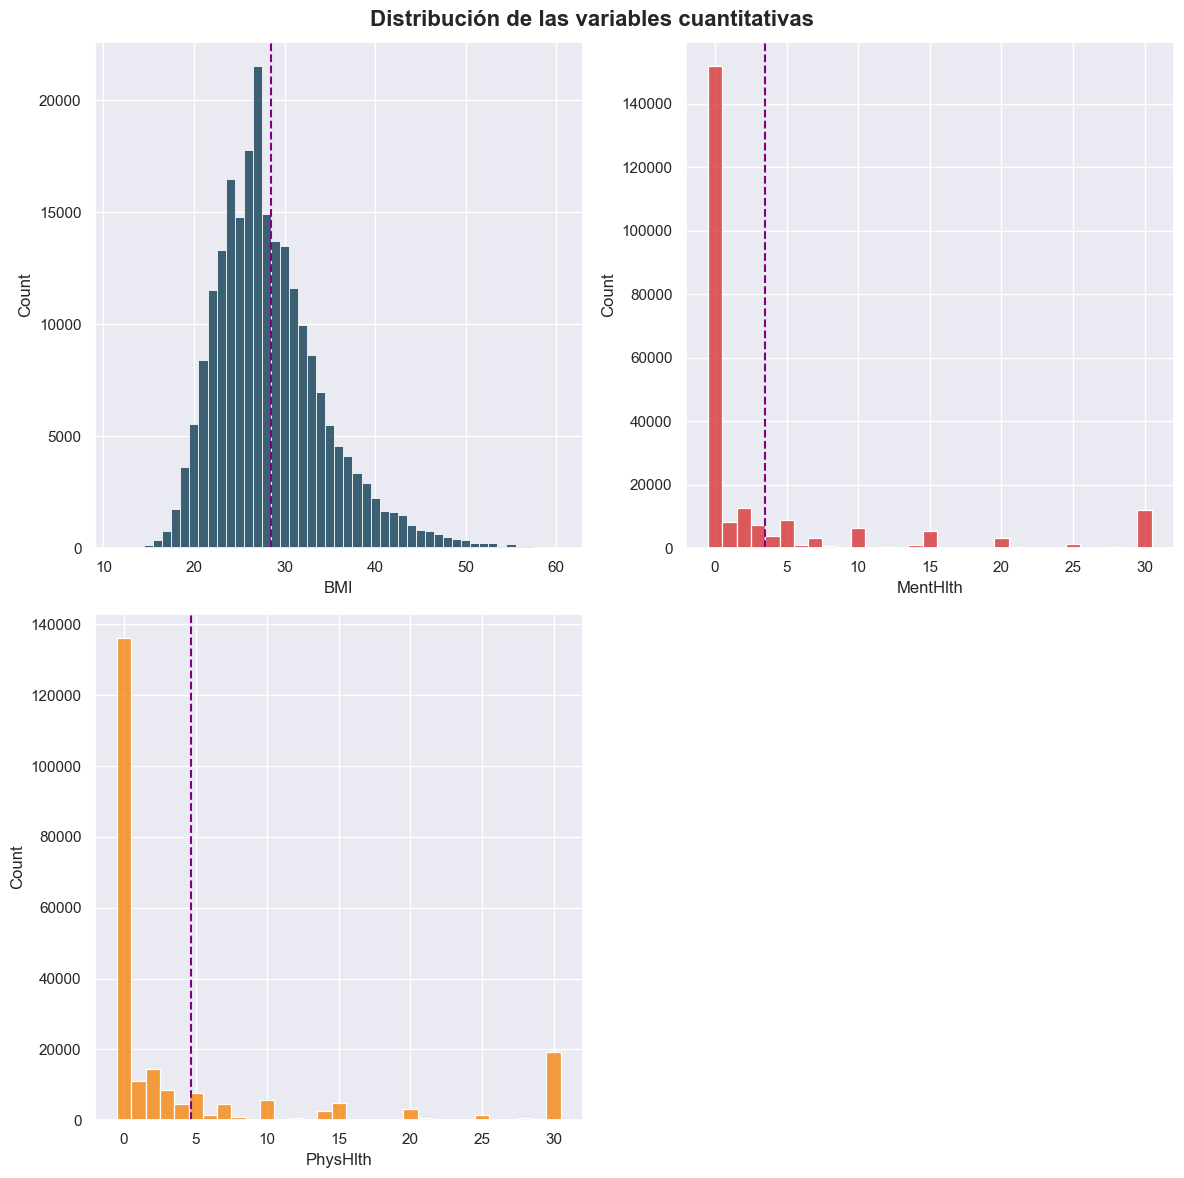

In [312]:
# Creamos la matriz de gráficos 
# ==============================================================================

fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(12, 12)
                         )

# Creamos los histogramas de las variables cuantitativas
# ==============================================================================
sns.histplot(data= df, x='BMI', ax= axes[0, 0], color= palette[0], discrete= True)
sns.histplot(data= df, x='MentHlth', ax= axes[0, 1], color= palette[1], discrete= True)
sns.histplot(data= df, x='PhysHlth', ax= axes[1, 0], color= palette[2], discrete= True)

# Añadimos la media de cada variable
# ==============================================================================
axes[0, 0].axvline(df['BMI'].mean(), color= 'purple', linestyle= '--')
axes[0, 1].axvline(df['MentHlth'].mean(), color= 'purple', linestyle= '--')
axes[1, 0].axvline(df['PhysHlth'].mean(), color= 'purple', linestyle= '--')

fig.delaxes(axes[1,1])
fig.suptitle('Distribución de las variables cuantitativas', fontsize= 16, fontweight= 'bold')
fig.tight_layout();


Del análisis visual de las representaciones gráficas, podemos observar lo siguiente:

- La variable `BMI` muestra una concentración de datos alrededor de la media, que es aproximadamente 28. A medida que nos alejamos de la media, la cantidad de mediciones disminuye. La distribución se asemeja a una distribución normal, aunque presenta una ligera asimetría positiva, indicando que la cola de la distribución se extiende hacia la derecha.

- En cuanto a `MentHlth`, la mayor concentración de datos se encuentra en el valor 0. A medida que este valor aumenta, la concentración de datos disminuye. Es relevante notar una pequeña concentración en el valor 30, lo que indica que una cantidad considerable de personas reportaron dificultades en su salud mental durante todos los días de los últimos 30 días. Además, las personas que reportan valores de días mayores o iguales a 10 tienden a seleccionar valores múltiplos de 5, lo que es curioso y podría ser motivo de investigación adicional.

- `PhysHlth` presenta una distribución muy similar a la de `MentHlth`. El promedio se encuentra entre 4 y 5 días, y también presenta una concentración considerable en los 30 días, al igual que la otra variable.

### 1.6.2 Variables Categóricas

A continuación, procederemos a realizar el análisis univariable de las variables categóricas del conjunto de datos.

In [313]:
# Hallamos los estadísticos descriptivos de las variables categóricas del conjunto de datos
# ==============================================================================

df.describe(include= 'category')

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
count,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0,228669.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,13.0,6.0,8.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0
freq,193743.0,124805.0,127650.0,219396.0,122107.0,218417.0,205028.0,167709.0,140157.0,181715.0,214751.0,216337.0,207429.0,77140.0,186319.0,128262.0,29580.0,87901.0,71401.0


Creamos las representaciones gráficas de las variables categóricas

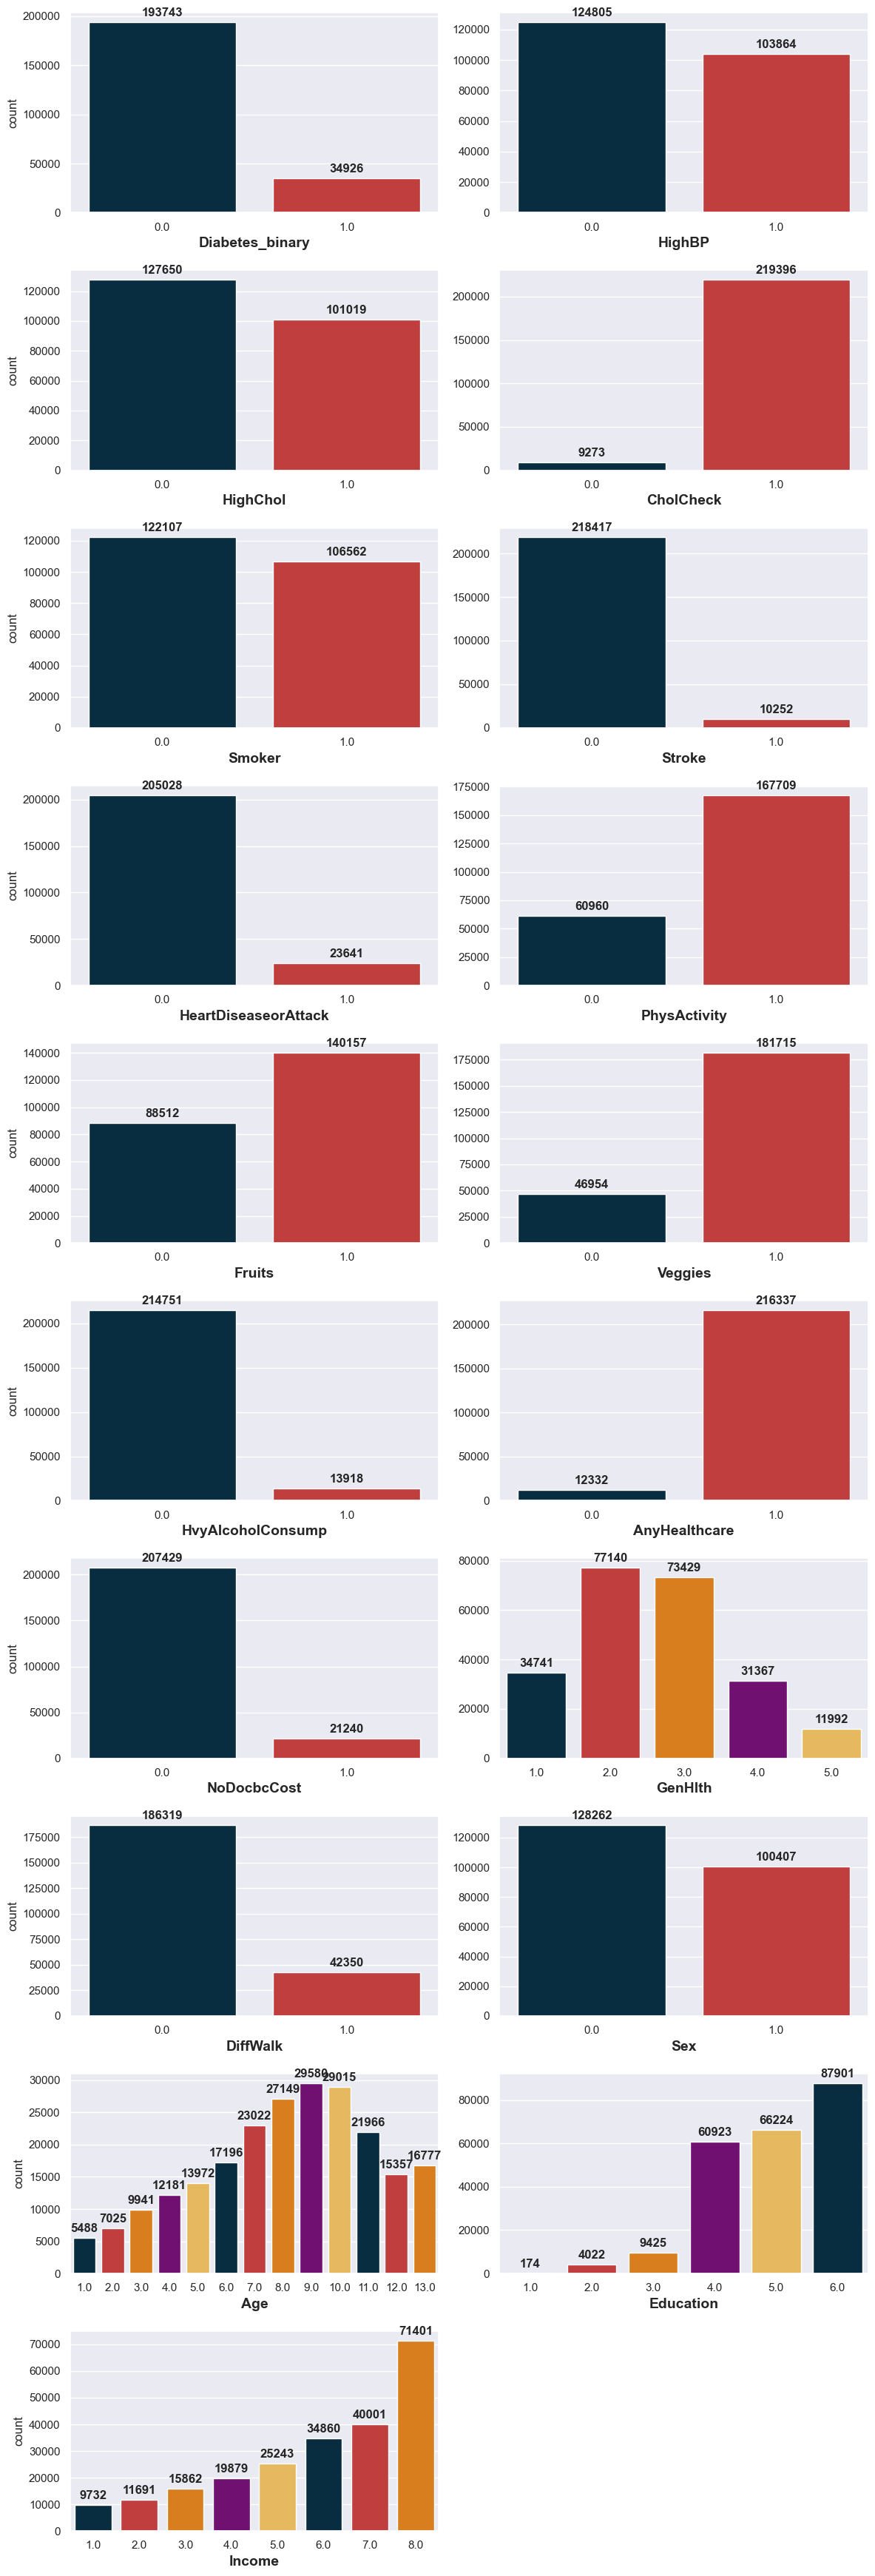

In [314]:
# Creamos la matriz de gráficos
# ==============================================================================

fig, axes = plt.subplots(nrows=10, 
                         ncols=2, 
                         figsize=(12, 35)
                         )

caracteristicas_categoricas = df.select_dtypes(include=['category']).columns
axes = axes.flatten()

# Generamos un gráfico de barras para cada variable categórica del DataFrame
# ==============================================================================

for i in range(len(caracteristicas_categoricas)):
    fila = i // 2
    columna = i % 2
    ax = sns.countplot(data=df, x=caracteristicas_categoricas[i], ax=axes[i], palette= palette)
    axes[i].set_xlabel(caracteristicas_categoricas[i], fontsize=14, fontweight='bold')
    if columna == 1:
        axes[i].set_ylabel('')
    
    # Agregamos los valores por encima de cada barra
    # ===========================================================================
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points',
                    fontsize=12,
                    fontweight='bold'
                    )
fig.delaxes(axes[19])
fig.tight_layout()
plt.show()

Del análisis univariable realizado sobre las variables categóricas, podemos observar lo siguiente:

- La mayoría de las personas encuestadas no presentan diabetes; de las 228,669 personas, solo 34,926 presentan diabetes, es decir, aproximadamente el 15%.

- Hay una mayor cantidad de personas que no han sido diagnosticadas con presión alta en comparación con los que sí lo fueron. Sin embargo, la diferencia es relativamente pequeña en relación con el total de personas encuestadas, siendo de cerca de 21,000 personas, es decir, aproximadamente el 10%.

- Más de la mitad de las personas encuestadas han sido diagnosticadas con colesterol alto, con una diferencia de 26,631 personas con respecto a quienes no lo han sido.

- La gran mayoría de las personas se ha realizado al menos un chequeo de colesterol en los últimos 5 años; solo 9,273 personas no lo han hecho, lo que representa aproximadamente el 4% de todas las personas.

- Existe una pequeña diferencia a favor de las personas que han fumado menos de 100 cigarrillos a lo largo de su vida en comparación con quienes han fumado más. Esta diferencia es de 15,545 personas.

- Solo 10,252 personas han sufrido un accidente cardiovascular, lo que representa aproximadamente el 4% de todas las personas encuestadas.

- Aproximadamente el 10% de las personas encuestadas ha tenido alguna enfermedad cardíaca o ataque al corazón a lo largo de su vida.

- La gran mayoría de las personas ha realizado alguna actividad física fuera de su trabajo habitual en los últimos 30 días.

- La mayoría de las personas consume frutas y verduras una o más veces al día. La diferencia es más notable en el consumo de vegetales, donde hay una mayor cantidad de personas que consumen vegetales en comparación con quienes no lo hacen.

- Cerca del 95% de las personas encuestadas no consumen alcohol en exceso, frente al 5% aproximadamente, equivalente a 13,918 personas.

- La mayoría de las personas cuenta con algún tipo de seguro de salud o cobertura médica. También predomina la cantidad de personas que han podido ver a un médico en los últimos 12 meses sin problemas de costo, indicando que no reflejan problemas de acceso a la atención médica.

- La mayor cantidad de personas realiza una autoevaluación de su salud general con valores de 2 o 3, correspondientes a "sobresaliente" y "regular", respectivamente. La menor cantidad de personas se autoevalúa con el valor de 5, correspondiente a un estado de salud "pobre". Además, hay 34,741 personas que evalúan su salud general como "excelente".

- Aproximadamente el 22% de las personas encuestadas manifiestan dificultades al caminar o subir escaleras.

- Se encuestó a una mayor cantidad de personas de género masculino, con una diferencia de 17,855 frente al género femenino.

- La mayor concentración de personas se encuentra en el rango de edad de 50 a 69 años. Por otro lado, 16,777 personas tienen 80 años o más. La menor cantidad de personas corresponde al rango de edad de 18 a 24 años, con solo 5,488 personas.

- Podemos observar que, a medida que aumenta el nivel educativo, también aumenta la cantidad de personas. El nivel educativo máximo alcanzado por los encuestados es "graduado de universidad o escuela técnica" con aproximadamente el 38%. Solo aproximadamente el 5% de las personas tienen un nivel educativo de secundaria o menor.

- Similar al nivel educativo, conforme aumenta el nivel de ingreso, también lo hace la cantidad de personas. De esta forma, 71,401 personas reciben ingresos anuales mayores a 75,000, mientras que solo 9,732 personas reciben ingresos anuales menores a 10,000.

## Análisis Bivariable

A continuación, realizaremos el análisis bivariable de las variables categóricas en relación con la variable objetivo, que es `Diabetes_binary`.

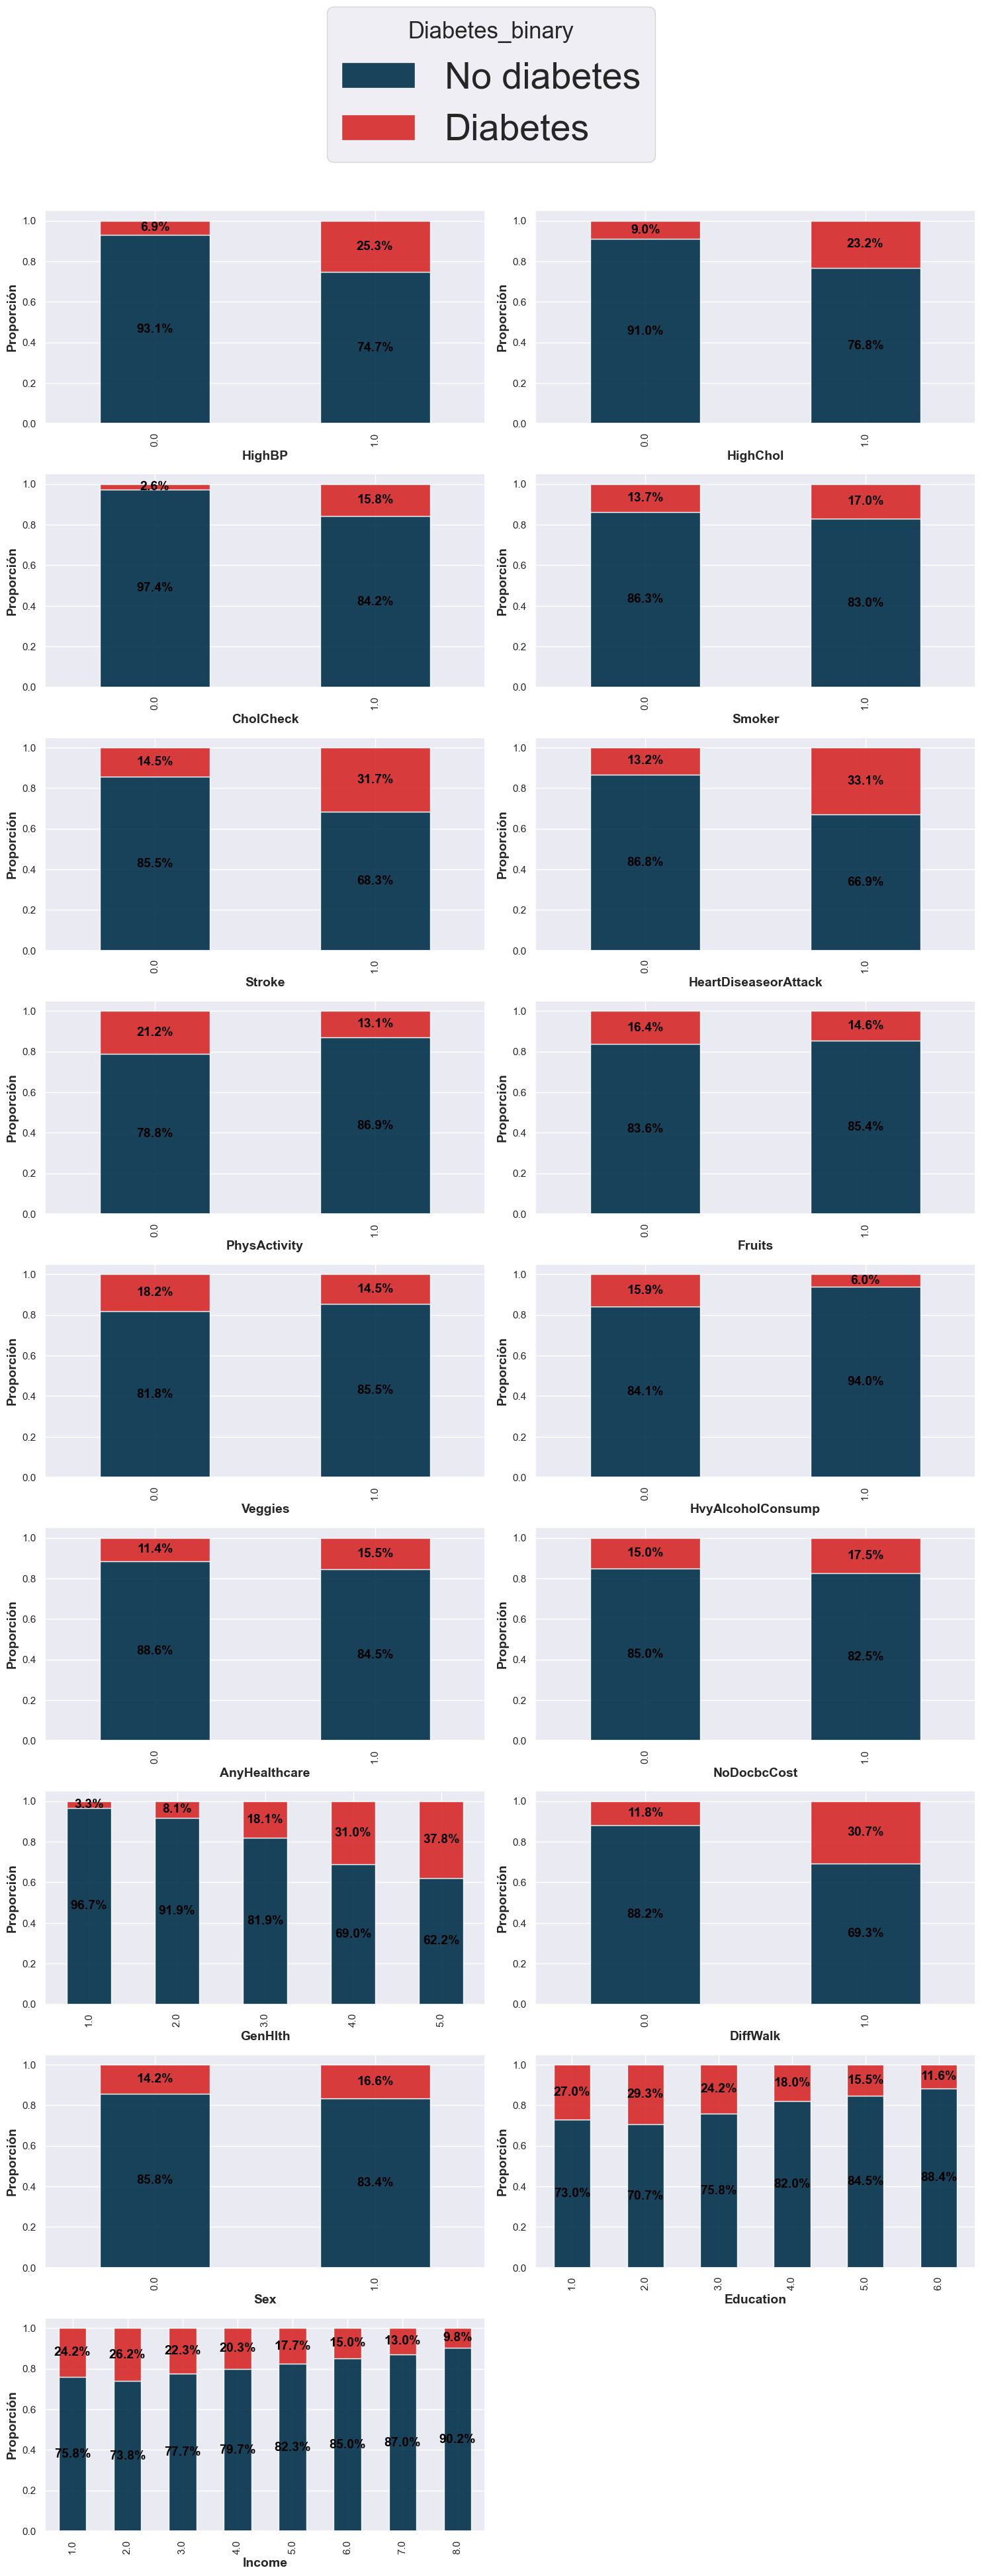

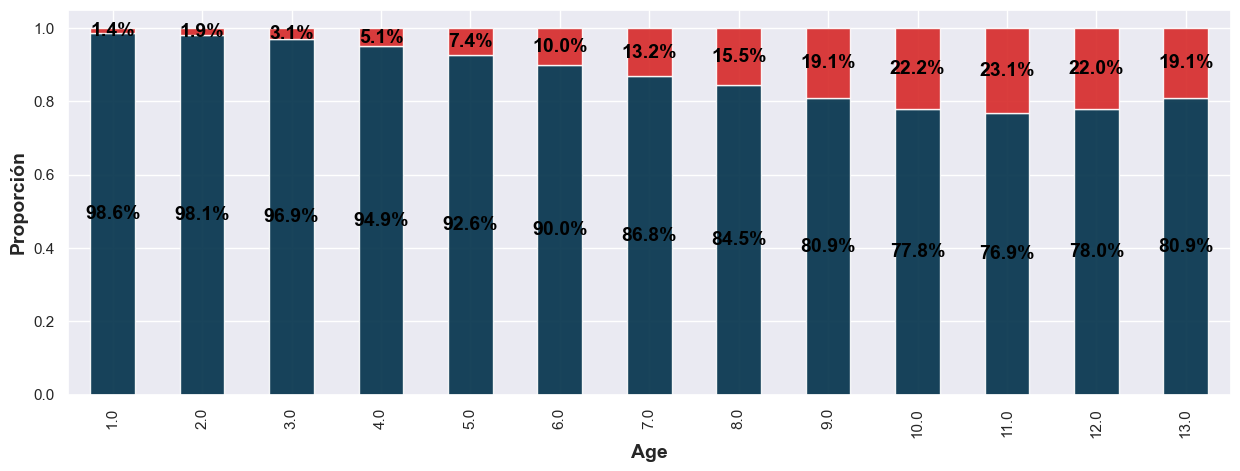

In [315]:
# Creamos las gráficas correspondientes a las variables categóricas en función de 'Diabetes_binary'
# ==============================================================================

# Definimos las variables categóricas
# ==============================================================================

variables_categoricas = df.select_dtypes(include=['category']).columns.drop(['Diabetes_binary', 'Age'])

# Creamos la matriz de gráficos
# ==============================================================================

fig, axes = plt.subplots(nrows= 10, 
                         ncols=2, 
                         figsize= (15, 40)
                         )
axes = axes.flatten()


# Generamos los gráficos de barras apiladas para cada variable categórica en función de 'Diabetes_binary'
# ==============================================================================

for i, var in enumerate(variables_categoricas):
    
    crosstab = pd.crosstab(df[var], 
                           df['Diabetes_binary'], 
                           normalize='index'
                           )
    
    crosstab.plot(kind='bar', 
                  stacked=True, 
                  ax=axes[i+2], 
                  color=  palette[:2], 
                  alpha= 0.9, 
                  legend= False
                  )
    
    axes[i+2].set_xlabel(var, 
                         fontsize=14, 
                         fontweight='bold'
                         )
    
    axes[i+2].set_ylabel('Proporción', 
                         fontsize=14, 
                         fontweight='bold'
                         )

    # Añadimos los porcentajes a las barras de los gráficos de barras apiladas de cada variable categórica
    # ==============================================================================
        
    for p in axes[i+2].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        axes[i+2].annotate(f'{height:.1%}', 
                           (x + width / 2, y + height / 2), 
                           ha='center', 
                           va='center', 
                           fontsize=14, 
                           color='black', 
                           fontweight='bold'
                           )

# Eliminamos las gráficas que no se van a utilizar
# ==============================================================================

indices_eliminar = [0, 1, 19]

for i in indices_eliminar:
    fig.delaxes(axes[i])


# Creamos una leyenda para los gráficos de barras apiladas
# ==============================================================================

fig.legend({'No diabetes': 0, 'Diabetes': 1},  
           loc='upper center', 
           bbox_to_anchor= (0.5, 0.98), 
           title='Diabetes_binary', 
           fontsize=40, 
           title_fontsize='25'
           )

fig.tight_layout()
plt.show();


# Creamos un gráfico de barras apiladas para la variable 'Age' en función de 'Diabetes_binary'
# ==============================================================================

fig, axes = plt.subplots(nrows= 1, 
                         ncols=1, 
                         figsize= (15, 5)
                         )

# Generamos el gráfico de barras apiladas para la variable 'Age' en función de 'Diabetes_binary'
# ==============================================================================

crosstab_age = pd.crosstab(df['Age'], 
                           df['Diabetes_binary'], 
                           normalize='index'
                           )

crosstab_age.plot(kind='bar', 
                  stacked=True, 
                  ax=axes, 
                  color=palette[:2], 
                  alpha=0.9, 
                  legend=False
                  )

axes.set_xlabel('Age', 
                fontsize=14, 
                fontweight='bold'
                )

axes.set_ylabel('Proporción', 
                fontsize=14, 
                fontweight='bold'
                )

# Añadimos los porcentajes a las barras del gráfico de barras apiladas de la variable 'Age'
# ==============================================================================

for p in axes.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes.annotate(f'{height:.1%}', 
                  (x + width / 2, y + height / 2),
                  ha='center', 
                  va='center', 
                  fontsize=14, 
                  color='black', 
                  fontweight='bold'
                  )
plt.show();




Las gráficas generadas se basan en proporciones en lugar de valores numéricos absolutos debido al desequilibrio entre las categorías de las variables. En la mayoría de los casos, una categoría predomina significativamente sobre las demás. Para obtener una perspectiva más completa y objetiva, se utilizaron proporciones, permitiendo un análisis más exhaustivo. De acuerdo con las representaciones gráficas generadas, se observa lo siguiente:

- Hay un aumento significativo en la prevalencia de diabetes entre las personas diagnosticadas con presión alta. Aproximadamente una de cada cuatro personas con presión alta también sufre de diabetes. En contraste, solo alrededor de una persona de cada veinte sin diagnóstico de presión alta presenta diabetes. Esto indica que ser diagnosticado con presión alta aumenta considerablemente las probabilidades de tener diabetes.

- Un diagnóstico de colesterol alto está fuertemente asociado con un mayor riesgo de diabetes. El 23.2% de las personas con colesterol alto también padecen de diabetes, evidenciando una relación significativa entre ambas condiciones.

- La variable 'ColCheck', que indica si una persona se ha sometido a un chequeo de colesterol en los últimos 5 años, revela que el 15.8% de las personas con diabetes se han realizado dicho chequeo. Esto contrasta con el 2% de las personas sin diabetes que también se han sometido a un chequeo. Este hallazgo sugiere que el diagnóstico de diabetes podría influir en la decisión de realizarse un chequeo de colesterol para controlar la salud.

- Las personas que han fumado más de 100 cigarrillos a lo largo de su vida tienen una probabilidad ligeramente mayor de presentar diabetes. Aunque la diferencia no es extremadamente pronunciada, es recomendable realizar análisis adicionales para explorar si esta variable podría estar asociada con hábitos poco saludables que aumenten el riesgo de diabetes.

- El 31.7% de las personas que han sufrido un accidente cardiovascular también presentan diabetes, comparado con el 14.5% de las personas con diabetes que no han experimentado un accidente cardiovascular. Este aumento en la prevalencia sugiere que los accidentes cardiovasculares son un factor considerablemente influyente en el riesgo de diabetes.

- De manera similar a los accidentes cardiovasculares, haber sufrido una enfermedad cardíaca o un ataque al corazón también incrementa significativamente las probabilidades de tener diabetes. La proporción observada es comparable a la de los accidentes cardiovasculares, indicando una influencia considerable en el diagnóstico de diabetes.

- Tener una actividad física fuera del trabajo habitual disminuye las posibilidades de presentar diabetes, ya que solo el 13.1% de las personas que realizan alguna actividad física padecen diabetes, en comparación con el 21.2% de las personas que no practican ninguna actividad. Esto sugiere que los hábitos sedentarios pueden aumentar las probabilidades de desarrollar diabetes.

- Las personas que no consumen frutas o verduras tienen una probabilidad ligeramente mayor de presentar diabetes. Sin embargo, la diferencia es de solo 2 puntos porcentuales para el consumo de frutas y 4 puntos porcentuales para el consumo de vegetales. Aunque consumir frutas y verduras regularmente puede ser beneficioso en muchos aspectos, no parece tener una gran influencia en el riesgo de diabetes.

- Se observa que las personas que consumen cerveza tienen una disminución en las probabilidades de sufrir diabetes. No obstante, esta mejora está asociada a un consumo bajo y moderado, no excesivo. Algunos estudios sugieren que el alcohol puede estar relacionado con un menor riesgo de desarrollar diabetes tipo 2. Sin embargo, el consumo excesivo y recurrente de alcohol puede tener efectos negativos en la salud y aumentar el riesgo de desarrollar diversas enfermedades, incluida la diabetes.

- El 15.5% de las personas con seguro de salud o cobertura médica presentan diabetes, frente al 11.4% de las personas con diabetes que no tienen seguro de salud. Esto podría estar relacionado con diversos factores, como si el seguro fue adquirido después del diagnóstico de diabetes. Sin embargo, se requieren estudios adicionales para obtener conclusiones definitivas sobre este aspecto.

- No se observa una diferencia significativa entre las personas que han visto a un médico en los últimos 12 meses debido al costo y aquellas que no lo han hecho en relación con el desarrollo de diabetes.

- La percepción de la salud influenciada por la presencia de diabetes es evidente en las autoevaluaciones realizadas. Solo el 3.3% de las personas que calificaron su salud como "Excelente" padecen diabetes, mientras que el 37.8% de las personas que evaluaron su salud como "Pobre" presentan diabetes.

- Se observa un aumento considerable en la prevalencia de diabetes entre las personas que tienen dificultades para caminar o subir escaleras en comparación con quienes no tienen diabetes. Entre las personas encuestadas con dificultades para caminar, el 30.7% sufre de diabetes.

- De acuerdo con el análisis, no parece haber una relación significativa entre el género y las probabilidades de desarrollar diabetes, ya que la diferencia porcentual es mínima.

- Tanto el nivel educativo como el nivel de ingresos influyen en el desarrollo de la diabetes. A mayor nivel educativo, menores son las probabilidades de desarrollar diabetes. Del mismo modo, a medida que aumentan los ingresos anuales, disminuyen las probabilidades de padecer diabetes. Esto puede explicarse por el acceso a mejores servicios de salud, que permite un mejor control del estado de salud.

- En cuanto a la edad, se observa una tendencia que indica que conforme aumenta la edad, también aumentan las probabilidades de desarrollar diabetes. Según el estudio, el rango de edad con mayores probabilidades de desarrollar la enfermedad es de 70 a 74 años.

# 2. Implementación del Modelo de Clasificación

A continuación, crearemos un modelo de regresión logística que nos permitirá predecir si una persona padece o no de diabetes, basándonos en sus características principales. Además, evaluaremos la bondad de ajuste del modelo para analizar su capacidad de generalización.

## 2.1 Preparación de Datos

Para llevar a cabo la preparación de los datos, lo primero que evaluaremos si la variable objetivo en nuestro conjunto de datos esta balanceada, es decir, si la proporción de los valores es similar o si hay un valor predominante.

In [316]:
# Observamos la proporción de la variable 'Diabetes_binary' en el conjunto de datos
# ==============================================================================

df['Diabetes_binary'].value_counts(normalize= True)

Diabetes_binary
0.0    0.847264
1.0    0.152736
Name: proportion, dtype: float64

Como podemos observar, la clase predominante en la variable `Diabetes_binary` es el valor de 0, que corresponde a las personas que no presentan diabetes, con un porcentaje del 84%. Dado que la diferencia es tan alta y que en nuestro conjunto de datos disponemos de más de 200,000 observaciones, lo más conveniente es reducir la cantidad de observaciones de las personas que no tienen diabetes. Esto se hace con la finalidad de balancear la variable objetivo y evitar que una clase esté sobrerrepresentada, lo que podría sesgar nuestro modelo de regresión logística disminuyendo su capacidad de generalización.

Primero, identificaremos los registros que tienen en la variable `Diabetes_binary` un valor de 1, es decir, las personas que presentan diabetes, y los asignaremos a una variable.

In [317]:
# Asignamos las personas con diabetes a un nuevo DataFrame llamado 'df_diabeticos'
# ==============================================================================

df_diabeticos = df[df['Diabetes_binary'] == 1]
df_diabeticos

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30,30,1.0,0.0,9.0,5.0,1.0
10,1.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0,0,0.0,1.0,13.0,6.0,8.0
13,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0,0,1.0,0.0,11.0,4.0,6.0
17,1.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0,0,0.0,1.0,7.0,5.0,6.0
23,1.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0,0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0,0,0.0,0.0,6.0,4.0,1.0
253668,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0,0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15,0,1.0,0.0,13.0,6.0,4.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0,0,1.0,0.0,11.0,2.0,4.0


Como este DataFrame contiene 34,926 registros, y queremos que los valores queden balanceados, obtendremos una muestra de los registros correspondientes a las personas que no tienen diabetes y los asignaremos a una variable.

In [318]:
# Asignamos las personas sin diabetes a un nuevo DataFrame llamado 'df_no_diabeticos'
# ==============================================================================

df_no_diabeticos = df[df['Diabetes_binary'] == 0].sample(n= 34926, 
                                                         random_state= 123
                                                         )
df_no_diabeticos

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
35451,0.0,1.0,0.0,1.0,35.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,4.0,1,15,1.0,0.0,8.0,5.0,5.0
22817,0.0,0.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0,0,0.0,0.0,8.0,5.0,6.0
34569,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,7,0,0.0,0.0,7.0,6.0,8.0
118152,0.0,1.0,0.0,1.0,36.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2,0,0.0,0.0,3.0,6.0,8.0
220720,0.0,0.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0,0,0.0,0.0,12.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60242,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2,0,0.0,0.0,4.0,6.0,8.0
88431,0.0,1.0,1.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0,30,1.0,0.0,11.0,4.0,4.0
192875,0.0,0.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,2,0,1.0,0.0,13.0,5.0,5.0
196790,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,2,4,0.0,0.0,6.0,5.0,8.0


Ahora, concatenamos los dos DataFrames generados en un solo DataFrame resultante.

In [319]:
# Unimos los DataFrames 'df_diabeticos' y 'df_no_diabeticos' en un nuevo DataFrame llamado 'df_equilibrado'
# ==============================================================================

df_equilibrado = pd.concat([df_diabeticos, df_no_diabeticos], 
                           axis= 0, 
                           ignore_index= True
                           )

df_equilibrado

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30,30,1.0,0.0,9.0,5.0,1.0
1,1.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0,0,0.0,1.0,13.0,6.0,8.0
2,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0,0,1.0,0.0,11.0,4.0,6.0
3,1.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0,0,0.0,1.0,7.0,5.0,6.0
4,1.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0,0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69847,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2,0,0.0,0.0,4.0,6.0,8.0
69848,0.0,1.0,1.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0,30,1.0,0.0,11.0,4.0,4.0
69849,0.0,0.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,2,0,1.0,0.0,13.0,5.0,5.0
69850,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,2,4,0.0,0.0,6.0,5.0,8.0


Comprobamos que la variable objetivo del DataFrame resultante esté equilibrada.

In [320]:
# Comprobamos que el nuevo DataFrame 'df_equilibrado' esté balanceado en la variable 'Diabetes_binary'
# ==============================================================================

df_equilibrado['Diabetes_binary'].value_counts(normalize= True)

Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Ahora que la variable objetivo esta balanceada, seleccionamos el conjunto de características y la variable objetivo.

In [321]:
# Seleccionamos las variables independientes y la variable dependiente
# ==============================================================================

X = df_equilibrado.drop('Diabetes_binary', axis= 1)
y = df_equilibrado['Diabetes_binary']

Ahora procedemos a realizar la división de nuestro conjunto de datos en datos de entrenamiento, que serán utilizados para alimentar el modelo durante su proceso de entrenamiento, y datos de prueba, que servirán para evaluar la precisión y el rendimiento del modelo.
 
Utilizaremos una proporción de  70% para los datos de entrenamiento y el 30% restante para los datos de prueba.

In [322]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

print(f"Dimensiones del X_train: {X_train.shape}")
print(f"Dimensiones del X_test: {X_test.shape}")
print(f"Dimensiones del y_train : {y_train.shape}")
print(f"Dimensiones del y_test: {y_test.shape}")

Dimensiones del X_train: (48896, 21)
Dimensiones del X_test: (20956, 21)
Dimensiones del y_train : (48896,)
Dimensiones del y_test: (20956,)


Ahora procedemos a escalar nuestro conjunto de características, tanto las que forman parte del entrenamiento del modelo como las de prueba.

In [323]:
# Escalamos las características con StandardScaler
# ==============================================================================

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2.2 Entrenamiento del Modelo

A continuación, realizaremos el entrenamiento del modelo utilizando el conjunto de datos de entrenamiento.

In [324]:
# Creamos el modelo de regresión logística
# ==============================================================================

Logistic_model = LogisticRegression(solver='liblinear', 
                                    max_iter=1000, 
                                    random_state= 123
                                    )

Logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=123, solver='liblinear')

Una vez que tenemos el modelo entrenado, generaremos las predicciones del modelo sobre datos que no han sido vistos durante el entrenamiento, es decir, el conjunto de características de prueba. Posteriormente, evaluaremos el rendimiento del modelo de regresión logística.

In [325]:
# Realizamos las predicciones con el conjunto de prueba 'X_test'
# ==============================================================================

predicciones_modelo = Logistic_model.predict(X_test)
predicciones_modelo

array([1., 1., 1., ..., 1., 1., 0.])

## 2.3 Evaluación de Rendimiento del Modelo

Vamos a evaluar el modelo de regresión logística mediante diversas métricas, tales como precisión, F1-Score y Recall.

In [326]:
# Imprimimos el reporte de clasificación del modelo de regresión logística en el conjunto de prueba
# ==============================================================================

print(classification_report(y_test, predicciones_modelo))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72     10498
         1.0       0.72      0.75      0.74     10458

    accuracy                           0.73     20956
   macro avg       0.73      0.73      0.73     20956
weighted avg       0.73      0.73      0.73     20956



De acuerdo con las métricas de bondad de ajuste del modelo, podemos observar lo siguiente:

- La precisión obtenida por el modelo indica que el 74% de las predicciones realizadas en las que se predice que la persona no presenta diabetes son correctas. Por otro lado, el porcentaje obtenido para las predicciones realizadas de las personas que sí tienen la enfermedad es del 72%.

- El F1-Score proporciona una puntuación única que equilibra la precisión y el recall. Aquí, la puntuación F1 para la clase 1, que corresponde a que la persona tiene diabetes, es de 0.74, lo que sugiere que el modelo tiene un rendimiento moderadamente alto.

- La exactitud nos indica la proporción de resultados verdaderos, tanto positivos como negativos, divididos por el número total de casos examinados. Obtenemos un valor del 73%, lo que sugiere que el modelo tiene una buena capacidad de generalización.

Ahora procederemos a generar la matriz de confusión del modelo, de manera que podamos observar la cantidad de aciertos y errores en cada una de las clases predichas.

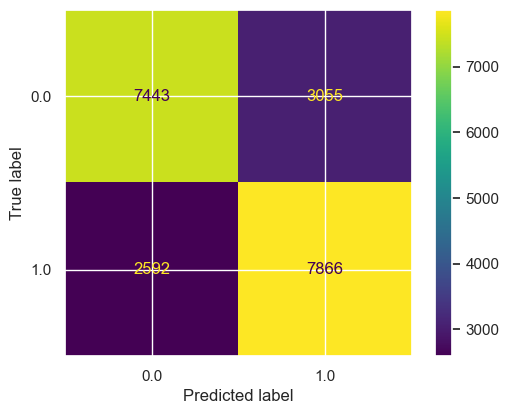

In [327]:
# Creamos la matriz de confusión
# ==============================================================================

cm = confusion_matrix(y_test.values.reshape(-1), predicciones_modelo.reshape(-1))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Logistic_model.classes_)

disp.plot();

De acuerdo con la matriz de confusión, podemos observar lo siguiente:

- El modelo clasificó incorrectamente 2,592 observaciones, indicando que las personas no tienen diabetes cuando en realidad sí la tienen. Además, el modelo falló en 3,055 observaciones que clasificó en la clase 1, es decir, que tienen la enfermedad, cuando en realidad no la tienen.

- El modelo predijo correctamente 7,443 observaciones que corresponden a las personas que no tienen diabetes. Asimismo, acertó en 7,866 observaciones que pertenecen a la clase 1, es decir, que sí tienen la enfermedad de diabetes.

# Referencias Bibliográficas

- Fiuza Pérez, M., & Rodríguez Pérez, J. C. (2000). La regresión logística: una herramienta versátil. Nefrología, 20(6), 495-500.

- Chitarroni, H. (2002). La regresión logística.

- Garriga Trillo, A. J. (2009). Introducción al análisis de datos. UNED - Universidad Nacional de Educación a Distancia.

- Hernández-Sampieri, R., Fernández-Collado, C., & Baptista-Lucio, P. (2006). Análisis de los datos cuantitativos. Metodología de la investigación, 6, 270-335.